In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
df = pd.read_csv('insurance.csv')
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
X = df.iloc[: , :-1].values
y = df.iloc[: , -1].values

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

array([[1.0, 0.0, 0.0, ..., 27.9, 0, 1],
       [0.0, 1.0, 0.0, ..., 33.77, 1, 0],
       [0.0, 1.0, 0.0, ..., 33.0, 3, 0],
       ...,
       [1.0, 0.0, 0.0, ..., 36.85, 0, 0],
       [1.0, 0.0, 0.0, ..., 25.8, 0, 0],
       [1.0, 0.0, 0.0, ..., 29.07, 0, 1]], shape=(1338, 10), dtype=object)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))

[[1.12e+04 9.72e+03]
 [9.49e+03 8.55e+03]
 [3.82e+04 4.57e+04]
 [1.63e+04 1.30e+04]
 [6.91e+03 9.64e+03]
 [3.96e+03 4.50e+03]
 [1.58e+03 2.20e+03]
 [1.44e+04 1.14e+04]
 [9.01e+03 7.54e+03]
 [7.51e+03 5.43e+03]
 [4.49e+03 6.75e+03]
 [1.03e+04 1.05e+04]
 [8.80e+03 7.34e+03]
 [3.80e+03 4.19e+03]
 [2.79e+04 1.83e+04]
 [1.07e+04 1.07e+04]
 [1.13e+04 1.25e+04]
 [6.11e+03 3.49e+03]
 [8.24e+03 6.46e+03]
 [2.71e+04 3.35e+04]
 [3.36e+04 2.40e+04]
 [1.44e+04 1.26e+04]
 [1.17e+04 2.30e+04]
 [3.21e+04 2.31e+04]
 [4.17e+03 1.67e+03]
 [9.25e+03 4.67e+03]
 [1.08e+03 3.73e+03]
 [9.80e+03 7.68e+03]
 [3.77e+03 3.76e+03]
 [1.04e+04 8.41e+03]
 [9.01e+03 8.06e+03]
 [4.01e+04 4.90e+04]
 [1.57e+04 1.30e+04]
 [1.39e+04 2.06e+04]
 [2.48e+04 1.46e+04]
 [5.17e+03 4.14e+03]
 [1.26e+04 8.35e+03]
 [3.08e+04 5.12e+04]
 [3.35e+04 4.00e+04]
 [3.67e+03 1.88e+03]
 [3.98e+03 5.46e+03]
 [3.99e+03 2.87e+03]
 [3.05e+04 2.01e+04]
 [3.95e+04 4.75e+04]
 [2.78e+04 3.61e+04]
 [5.09e+03 2.60e+04]
 [1.06e+04 1.97e+04]
 [7.83e+03 6.

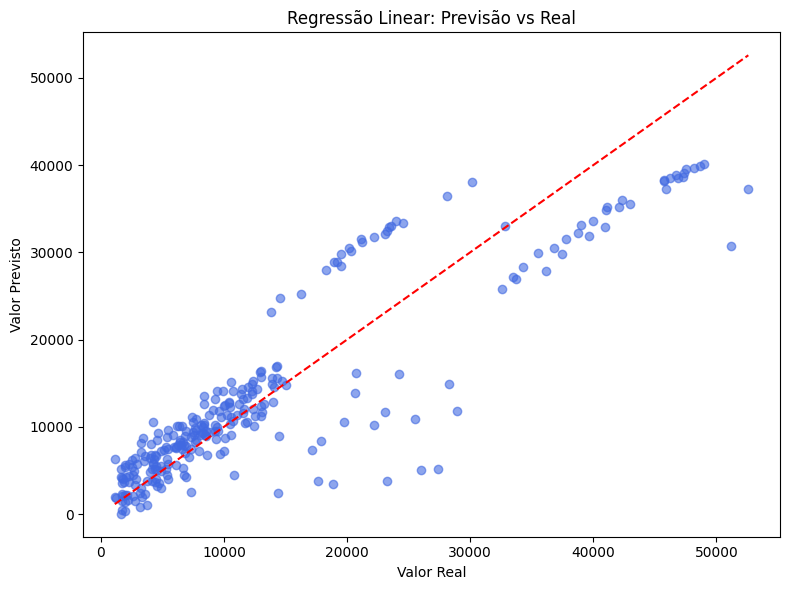

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # linha ideal
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.title('Regressão Linear: Previsão vs Real')
plt.grid(True)
plt.tight_layout()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.7999876970680435
RMSE: 5641.626558850189
MAE: 3933.272649405232


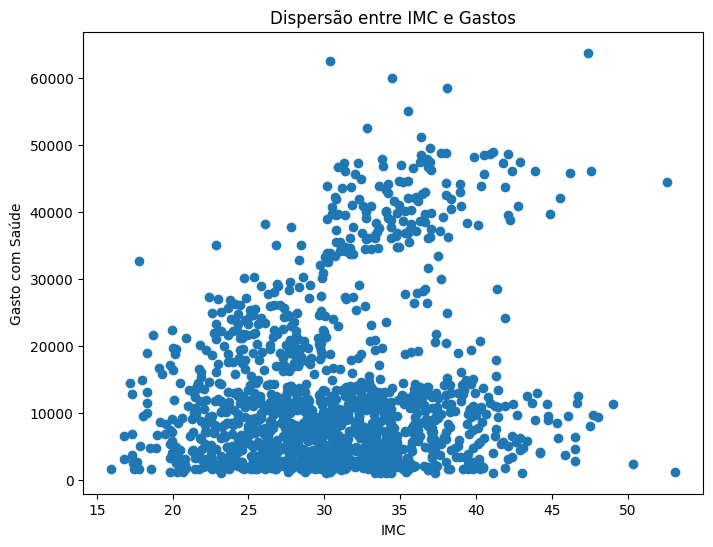

In [62]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['charges'])
plt.xlabel("IMC")
plt.ylabel("Gasto com Saúde")
plt.title("Dispersão entre IMC e Gastos")
plt.show()

In [61]:
media_gastos = df.groupby('smoker')['charges'].mean()
gasto_minimo_fumante = df.groupby('smoker')['charges'].min()
gasto_maximo_nao_fumante = df.groupby('smoker')['charges'].mean()
print(f'Custo Minimo para pessoas fumantes ${round(media_gastos[1], 2)}',)
print(f'Média de custo para pessoas não fumantes ${round(gasto_maximo_nao_fumante[0], 2)}',)

Custo Minimo para pessoas fumantes $32050.23
Média de custo para pessoas não fumantes $8434.27


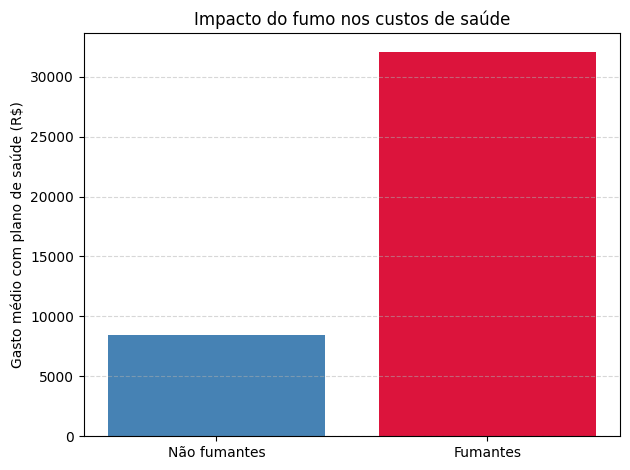

In [43]:
labels = ['Não fumantes', 'Fumantes']
values = media_gastos.values

plt.bar(labels, values, color=['steelblue', 'crimson'])
plt.ylabel('Gasto médio com plano de saúde (R$)')
plt.title('Impacto do fumo nos custos de saúde')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
